In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [5]:
dfg = pd.read_csv('wat-r8-good.csv')
dfm = pd.read_csv('wat-r8-mals.csv')

In [6]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,117,0,3,0xeae00,0,0,3,2,8,0,0,24,8,105,1,32,34,8,8,1
1,125,2,0,0xeae00,1,0,3,2,8,24,8,29,13,121,1,31,34,7,8,1
2,180,0,1,0xeae00,2,0,3,2,8,29,13,24,8,168,1,18,34,6,8,1
3,181,3,1,0xeae00,3,0,0,4,16,29,13,0,0,168,1,16,34,5,8,1
4,182,3,1,0xeae00,3,1,1,4,16,29,13,0,0,168,1,15,34,4,8,1


In [7]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,117,0,3,0xeae00,0,0,3,2,8,0,0,24,8,105,3,58,63,11,11,0
1,121,0,3,0x1b7e00,0,0,3,2,9,1,1,24,8,105,2,57,63,10,11,0
2,125,2,0,0xeae00,1,0,3,2,8,24,8,29,13,121,3,56,63,9,11,0
3,129,2,0,0x1b7e00,1,0,3,2,9,24,8,29,13,125,2,54,63,8,11,0
4,180,0,1,0xeae00,2,0,3,2,8,29,13,24,8,168,3,38,63,7,11,0


In [8]:
df = dfg.append(dfm, ignore_index=True)

In [9]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,117,0,3,0xeae00,0,0,3,2,8,0,0,24,8,105,1,32,34,8,8,1
1,125,2,0,0xeae00,1,0,3,2,8,24,8,29,13,121,1,31,34,7,8,1
2,180,0,1,0xeae00,2,0,3,2,8,29,13,24,8,168,1,18,34,6,8,1
3,181,3,1,0xeae00,3,0,0,4,16,29,13,0,0,168,1,16,34,5,8,1
4,182,3,1,0xeae00,3,1,1,4,16,29,13,0,0,168,1,15,34,4,8,1


In [10]:
df = df.sort_values('time')

In [11]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,117,0,3,0xeae00,0,0,3,2,8,0,0,24,8,105,1,32,34,8,8,1
20215,117,0,3,0xeae00,0,0,3,2,8,0,0,24,8,105,3,58,63,11,11,0
20216,121,0,3,0x1b7e00,0,0,3,2,9,1,1,24,8,105,2,57,63,10,11,0
20217,125,2,0,0xeae00,1,0,3,2,8,24,8,29,13,121,3,56,63,9,11,0
1,125,2,0,0xeae00,1,0,3,2,8,24,8,29,13,121,1,31,34,7,8,1
20218,129,2,0,0x1b7e00,1,0,3,2,9,24,8,29,13,125,2,54,63,8,11,0
20219,180,0,1,0xeae00,2,0,3,2,8,29,13,24,8,168,3,38,63,7,11,0
2,180,0,1,0xeae00,2,0,3,2,8,29,13,24,8,168,1,18,34,6,8,1
20220,181,3,1,0xeae00,3,0,0,4,16,29,13,0,0,168,3,37,63,6,11,0
3,181,3,1,0xeae00,3,0,0,4,16,29,13,0,0,168,1,16,34,5,8,1


In [12]:
df.to_csv('wat-r8-pkt.csv',index=False)

In [13]:
df = pd.read_csv("wat-r8-pkt.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,117,0,3,0xeae00,0,0,3,2,8,0,0,24,8,105,1,32,34,8,8,1
1,117,0,3,0xeae00,0,0,3,2,8,0,0,24,8,105,3,58,63,11,11,0
2,121,0,3,0x1b7e00,0,0,3,2,9,1,1,24,8,105,2,57,63,10,11,0
3,125,2,0,0xeae00,1,0,3,2,8,24,8,29,13,121,3,56,63,9,11,0
4,125,2,0,0xeae00,1,0,3,2,8,24,8,29,13,121,1,31,34,7,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39250,3251506,3,1,0x4d2c0,3,0,0,4,16,29,13,0,0,3251494,10027,19,27,1,1,1
39251,3251507,3,1,0x4d2c0,3,1,1,4,16,29,13,0,0,3251494,10027,17,27,1,1,1
39252,3251508,3,1,0x4d2c0,3,2,1,4,16,29,13,0,0,3251494,10027,16,27,1,1,1
39253,3251509,3,1,0x4d2c0,3,3,1,4,16,29,13,0,0,3251494,10027,15,27,1,1,1


In [14]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,-0.035619,0.027590,0.038985,-0.003897,0.006094,-0.049839,-0.049181,-0.043467,-0.047747,0.042655,0.042869,1.000000,0.981752,-0.040546,-0.089514,-0.383978,-0.464166,0.050224
outport,-0.035619,1.000000,-0.694200,0.070057,0.052159,-0.081472,0.696955,0.705842,0.893474,0.889331,-0.857923,-0.780018,-0.035615,-0.034845,-0.039077,0.261264,-0.076421,-0.048275,0.011526
inport,0.027590,-0.694200,1.000000,-0.064321,-0.036813,0.057502,-0.407471,-0.475289,-0.849632,-0.758730,0.404076,0.325912,0.027587,0.028644,0.001233,-0.177559,-0.007449,-0.047006,-0.002760
packet_type,0.038985,0.070057,-0.064321,1.000000,-0.122754,0.191741,-0.485698,-0.496920,0.008040,-0.072368,0.036823,0.060179,0.038987,0.040816,0.095709,0.009256,-0.013640,-0.034055,0.003085
flit_id,-0.003897,0.052159,-0.036813,-0.122754,1.000000,0.051132,0.294950,0.294914,0.023733,0.050764,-0.035276,-0.028575,-0.003900,-0.004102,-0.154186,-0.019637,-0.047740,0.024309,0.002353
flit_type,0.006094,-0.081472,0.057502,0.191741,0.051132,1.000000,-0.460709,-0.460653,-0.037071,-0.079293,0.055101,0.044633,0.006092,0.006407,-0.014553,0.051192,-0.048365,0.002408,-0.003676
vnet,-0.049839,0.696955,-0.407471,-0.485698,0.294950,-0.460709,1.000000,0.988823,0.660035,0.745274,-0.768469,-0.750414,-0.049837,-0.050215,-0.118543,0.162290,-0.049328,-0.028941,0.009323
vc,-0.049181,0.705842,-0.475289,-0.496920,0.294914,-0.460653,0.988823,1.000000,0.678337,0.747339,-0.734782,-0.708802,-0.049179,-0.049675,-0.117057,0.160230,-0.040063,-0.015674,0.008765
src_ni,-0.043467,0.893474,-0.849632,0.008040,0.023733,-0.037071,0.660035,0.678337,1.000000,0.980603,-0.779305,-0.723747,-0.043463,-0.043601,-0.036592,0.263267,-0.044518,-0.015760,0.007884
src_router,-0.047747,0.889331,-0.758730,-0.072368,0.050764,-0.079293,0.745274,0.747339,0.980603,1.000000,-0.846190,-0.803142,-0.047744,-0.048061,-0.046498,0.269133,-0.054454,-0.030624,0.009181


In [15]:
train_X = df.drop(columns=['packet_address','time','target','pkt_count_all','pkt_count_all','pkt_max_all','src_router','src_ni'])

In [16]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count,pkt_max
0,0,3,0,0,3,2,8,24,8,105,1,8,8
1,0,3,0,0,3,2,8,24,8,105,3,11,11
2,0,3,0,0,3,2,9,24,8,105,2,10,11
3,2,0,1,0,3,2,8,29,13,121,3,9,11
4,2,0,1,0,3,2,8,29,13,121,1,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39250,3,1,3,0,0,4,16,0,0,3251494,10027,1,1
39251,3,1,3,1,1,4,16,0,0,3251494,10027,1,1
39252,3,1,3,2,1,4,16,0,0,3251494,10027,1,1
39253,3,1,3,3,1,4,16,0,0,3251494,10027,1,1


In [17]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,1.000000,0.000000,0.00,1.000000,0.0,0.000,0.827586,0.615385,0.000000,0.000000,0.388889,0.388889
1,0.000000,1.000000,0.000000,0.00,1.000000,0.0,0.000,0.827586,0.615385,0.000000,0.000194,0.555556,0.555556
2,0.000000,1.000000,0.000000,0.00,1.000000,0.0,0.125,0.827586,0.615385,0.000000,0.000097,0.500000,0.555556
3,0.666667,0.000000,0.166667,0.00,1.000000,0.0,0.000,1.000000,1.000000,0.000005,0.000194,0.444444,0.555556
4,0.666667,0.000000,0.166667,0.00,1.000000,0.0,0.000,1.000000,1.000000,0.000005,0.000000,0.333333,0.388889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39250,1.000000,0.333333,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.000000,1.000000,0.973682,0.000000,0.000000
39251,1.000000,0.333333,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.000000,1.000000,0.973682,0.000000,0.000000
39252,1.000000,0.333333,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.000000,1.000000,0.973682,0.000000,0.000000
39253,1.000000,0.333333,0.500000,0.75,0.333333,1.0,1.000,0.000000,0.000000,1.000000,0.973682,0.000000,0.000000


In [18]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,-0.694200,0.070057,0.052159,-0.081472,0.696955,0.705842,-0.857923,-0.780018,-0.035615,-0.034845,-0.076421,-0.048275,0.011526
1,-0.694200,1.000000,-0.064321,-0.036813,0.057502,-0.407471,-0.475289,0.404076,0.325912,0.027587,0.028644,-0.007449,-0.047006,-0.002760
2,0.070057,-0.064321,1.000000,-0.122754,0.191741,-0.485698,-0.496920,0.036823,0.060179,0.038987,0.040816,-0.013640,-0.034055,0.003085
3,0.052159,-0.036813,-0.122754,1.000000,0.051132,0.294950,0.294914,-0.035276,-0.028575,-0.003900,-0.004102,-0.047740,0.024309,0.002353
4,-0.081472,0.057502,0.191741,0.051132,1.000000,-0.460709,-0.460653,0.055101,0.044633,0.006092,0.006407,-0.048365,0.002408,-0.003676
5,0.696955,-0.407471,-0.485698,0.294950,-0.460709,1.000000,0.988823,-0.768469,-0.750414,-0.049837,-0.050215,-0.049328,-0.028941,0.009323
6,0.705842,-0.475289,-0.496920,0.294914,-0.460653,0.988823,1.000000,-0.734782,-0.708802,-0.049179,-0.049675,-0.040063,-0.015674,0.008765
7,-0.857923,0.404076,0.036823,-0.035276,0.055101,-0.768469,-0.734782,1.000000,0.990141,0.042652,0.041945,0.088858,0.074275,-0.011743
8,-0.780018,0.325912,0.060179,-0.028575,0.044633,-0.750414,-0.708802,0.990141,1.000000,0.042866,0.042265,0.085347,0.075720,-0.011134
9,-0.035615,0.027587,0.038987,-0.003900,0.006092,-0.049837,-0.049179,0.042652,0.042866,1.000000,0.981752,-0.383978,-0.464167,0.050224


In [19]:
train_Y = df['target']

In [20]:
train_Y

0        1
1        0
2        0
3        0
4        1
        ..
39250    1
39251    1
39252    1
39253    1
39254    1
Name: target, Length: 39255, dtype: int64

In [21]:
pca = PCA(0.95)

In [22]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
principal_components = pca.transform(train_X)
principal_components

array([[ 1.40751257,  0.88672425,  0.04879033,  0.11042604, -0.62235003,
         0.7256442 ],
       [ 1.40891666,  0.91648598,  0.04806753,  0.11198972, -0.61472093,
         0.72957706],
       [ 1.34661912,  0.91521453,  0.01248602,  0.12361091, -0.60864689,
         0.75416051],
       ...,
       [-0.67443515, -0.63289807, -0.14606515,  0.02742448, -0.01266993,
         0.02468538],
       [-0.69734571, -0.62470344, -0.27645982, -0.16524775, -0.00430207,
        -0.04474459],
       [-0.68155461, -0.62488866, -0.28024363, -0.55500448, -0.03127274,
         0.0796259 ]])

In [24]:
pca.explained_variance_ratio_

array([0.54385047, 0.13002554, 0.12610048, 0.08950202, 0.05758779,
       0.03381044])

In [25]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

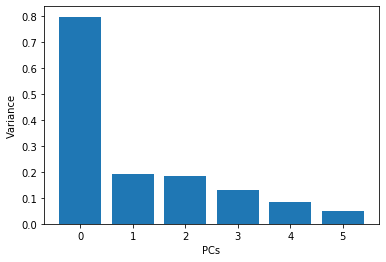

In [26]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [27]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5
0,1.407513,0.886724,0.048790,0.110426,-0.622350,0.725644
1,1.408917,0.916486,0.048068,0.111990,-0.614721,0.729577
2,1.346619,0.915215,0.012486,0.123611,-0.608647,0.754161
3,1.254781,0.887567,0.213585,0.042377,0.624088,0.815633
4,1.253613,0.861150,0.214268,0.041524,0.617198,0.811859
...,...,...,...,...,...,...
39250,-0.667316,-0.640907,-0.011887,0.609853,0.005933,-0.030255
39251,-0.651525,-0.641093,-0.015670,0.220097,-0.021038,0.094115
39252,-0.674435,-0.632898,-0.146065,0.027424,-0.012670,0.024685
39253,-0.697346,-0.624703,-0.276460,-0.165248,-0.004302,-0.044745


In [28]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,target
0,1.407513,0.886724,0.048790,0.110426,-0.622350,0.725644,1
1,1.408917,0.916486,0.048068,0.111990,-0.614721,0.729577,0
2,1.346619,0.915215,0.012486,0.123611,-0.608647,0.754161,0
3,1.254781,0.887567,0.213585,0.042377,0.624088,0.815633,0
4,1.253613,0.861150,0.214268,0.041524,0.617198,0.811859,1
...,...,...,...,...,...,...,...
39250,-0.667316,-0.640907,-0.011887,0.609853,0.005933,-0.030255,1
39251,-0.651525,-0.641093,-0.015670,0.220097,-0.021038,0.094115,1
39252,-0.674435,-0.632898,-0.146065,0.027424,-0.012670,0.024685,1
39253,-0.697346,-0.624703,-0.276460,-0.165248,-0.004302,-0.044745,1


In [29]:
final_df.corr()

,0,1,2,3,4,5,target
0,1.000000e+00,-2.380454e-15,6.496138e-15,-3.650447e-16,5.974311e-16,-4.145566e-15,-0.010818
1,-2.380454e-15,1.000000e+00,-6.626145e-16,4.218429e-16,9.209805e-17,-4.524675e-16,-0.004387
2,6.496138e-15,-6.626145e-16,1.000000e+00,8.756069e-16,1.118911e-15,-1.193557e-15,0.002923
3,-3.650447e-16,4.218429e-16,8.756069e-16,1.000000e+00,1.024723e-16,2.958137e-15,-0.001115
4,5.974311e-16,9.209805e-17,1.118911e-15,1.024723e-16,1.000000e+00,-3.067568e-15,-0.002444
5,-4.145566e-15,-4.524675e-16,-1.193557e-15,2.958137e-15,-3.067568e-15,1.000000e+00,-0.007284
target,-1.081809e-02,-4.387011e-03,2.923222e-03,-1.115487e-03,-2.443752e-03,-7.283522e-03,1.000000


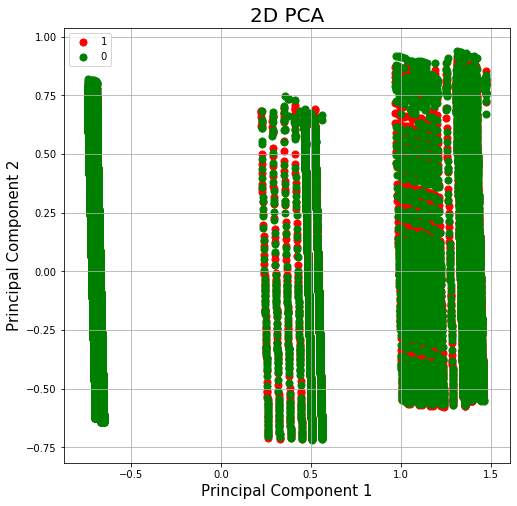

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,0,3,0,0,3,2,8,0,0,24,8,105,1,32,34,8,8,1
1,0,3,0,0,3,2,8,0,0,24,8,105,3,58,63,11,11,0
2,0,3,0,0,3,2,9,1,1,24,8,105,2,57,63,10,11,0
3,2,0,1,0,3,2,8,24,8,29,13,121,3,56,63,9,11,0
4,2,0,1,0,3,2,8,24,8,29,13,121,1,31,34,7,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39250,3,1,3,0,0,4,16,29,13,0,0,3251494,10027,19,27,1,1,1
39251,3,1,3,1,1,4,16,29,13,0,0,3251494,10027,17,27,1,1,1
39252,3,1,3,2,1,4,16,29,13,0,0,3251494,10027,16,27,1,1,1
39253,3,1,3,3,1,4,16,29,13,0,0,3251494,10027,15,27,1,1,1


In [32]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [33]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [34]:
seed = 7
np.random.seed(seed)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [36]:
model = Sequential()

In [37]:
n_cols = train_X.shape[1]
n_cols

13

In [38]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [40]:
model.fit(x_train, y_train, epochs=50, validation_split=0.4)

Train on 16015 samples, validate on 10678 samples
Epoch 1/50
16015/16015 [==============================] - 2s 133us/step - loss: 0.2497 - accuracy: 0.5090 - val_loss: 0.2495 - val_accuracy: 0.5214
Epoch 2/50
16015/16015 [==============================] - 2s 95us/step - loss: 0.2495 - accuracy: 0.5166 - val_loss: 0.2493 - val_accuracy: 0.5252
Epoch 3/50
16015/16015 [==============================] - 2s 104us/step - loss: 0.2493 - accuracy: 0.5187 - val_loss: 0.2492 - val_accuracy: 0.5287
Epoch 4/50
16015/16015 [==============================] - 2s 94us/step - loss: 0.2491 - accuracy: 0.5379 - val_loss: 0.2490 - val_accuracy: 0.5717
Epoch 5/50
16015/16015 [==============================] - 2s 99us/step - loss: 0.2488 - accuracy: 0.5454 - val_loss: 0.2488 - val_accuracy: 0.5457
Epoch 6/50
16015/16015 [==============================] - 2s 96us/step - loss: 0.2487 - accuracy: 0.5602 - val_loss: 0.2486 - val_accuracy: 0.5611
Epoch 7/50
16015/16015 [==============================] - 2s 113us

In [41]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [42]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.27%


In [43]:
dff = pd.read_csv('wat-r8-pkt.csv',nrows=500)

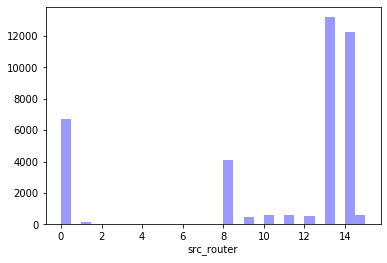

In [44]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

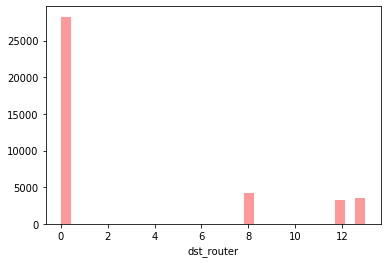

In [45]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

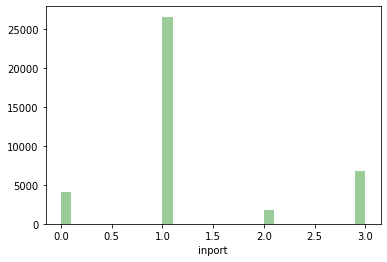

In [46]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

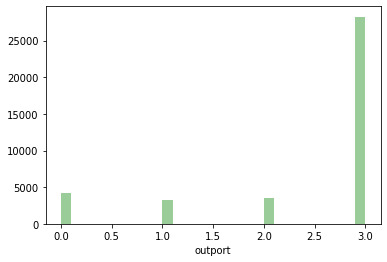

In [47]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

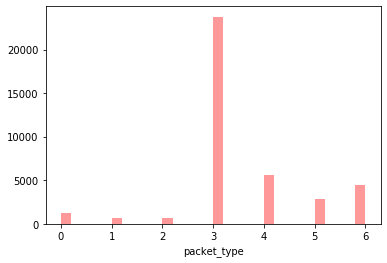

In [48]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')